### DATA PREPARATION

In [4]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

In [5]:
import os
import urllib
import urllib.request

if not os.path.isfile(FILE):
    urllib.request.urlretrieve(URL, FILE) #downloads file if file not in path

In [6]:
#unzip the downloaded files
from zipfile import ZipFile
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)
    

### DATA LOADING

In [7]:
labels = os.listdir('fashion_mnist_images/train')
print(labels)
files = os.listdir( 'fashion_mnist_images/train/0' )
print(files[:10])

['5', '0', '4', '2', '6', '3', '1', '8', '7', '9']
['4588.png', '5031.png', '3857.png', '4752.png', '5635.png', '2240.png', '3859.png', '1802.png', '3517.png', '1411.png']


In [8]:
# To handle image data, we’re going to make use of the Python
# package containing OpenCV

In [9]:
import cv2 
image_data = cv2.imread('fashion_mnist_images/train/7/0002.png',
                        cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49
  135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

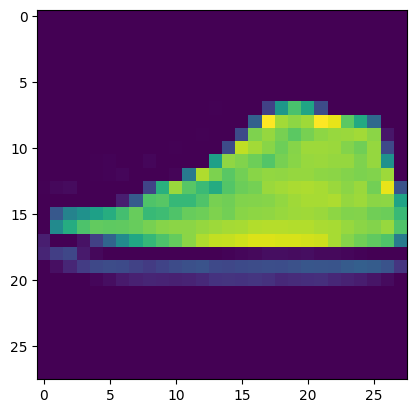

In [10]:
import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.show()

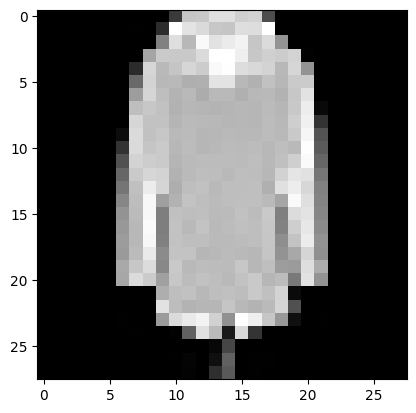

In [11]:
import matplotlib.pyplot as plt
image_data = cv2.imread('fashion_mnist_images/train/4/0034.png' ,
                        cv2.IMREAD_UNCHANGED)
plt.imshow(image_data, cmap = 'gray') #
plt.show()

In [12]:
# scan all directories and create a list of labels

X = []
y = []

for label in labels:
    for file in os.listdir(os.path.join(
        'fashion_mnist_images', 'train', label)):
        image = cv2.imread(os.path.join(
            'fashion_mnist_images/train', label, file), cv2.IMREAD_UNCHANGED)
        
        X.append(image)
        y.append(label)

In [13]:
import numpy as np

# Loading MNIST dataset
def load_mnist_dataset(dataset, path):
    X = []
    y = []

    for label in labels:
        for file in os.listdir(os.path.join(
            path, dataset, label)):
            image = cv2.imread(os.path.join(
                    path , dataset, label, file), cv2.IMREAD_UNCHANGED)
            
            X.append(image)
            y.append(label)
    return np.array(X), np.array(y).astype('uint8')

# create dataset
def create_data_mnist(path):
    X, y =load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    return X, y, X_test, y_test

In [14]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

### DATA PREPROCESSING

In [15]:
# scaling the data to -1 to 1 or 0 to 1

# scale features
# Scale to -1 to 1
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5


In [16]:
# flatten the dataset 

X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### DATA SHUFFLING

In [17]:
keys = np.array(range(X.shape[0]))
print(keys[:10])

[0 1 2 3 4 5 6 7 8 9]


In [18]:
import nnfs

nnfs.init()

np.random.shuffle(keys)
print(keys[:10])

[ 3048 19563 58303  8870 40228 31488 21860 56864   845 25770]


In [34]:
from nnfs.datasets import spiral_data

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

EPOCHS = 10
BATCH_SIZE = 128

steps = X.shape[0] // BATCH_SIZE

if steps * BATCH_SIZE < X.shape[0]:
    steps+=1
    
for epoch in range (EPOCHS):
    for step in range (steps):
        batch_X = X[step * BATCH_SIZE:(step + 1) * BATCH_SIZE]
        batch_y = y[step * BATCH_SIZE:(step + 1) * BATCH_SIZE]
        

In [35]:
import numpy as np

class Loss:
    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    # Regularization loss calculation
    def regularization_loss(self):
        # Initialize regularization loss to 0
        regularization_loss = 0
        
        # Calculate regularization loss for all trainable layers
        for layer in self.trainable_layers:
            # L1 regularization - weights
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
            
            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
            
            # L1 regularization - biases
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
            
            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
        
        return regularization_loss

    # Calculates the data and regularization losses
    def calculate(self, output, y, *, include_regularization=False):
        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Add accumulated sum of losses and sample count
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Calculates accumulated loss
    def calculate_accumulated(self, *, include_regularization=False):
        # Calculate mean loss
        data_loss = self.accumulated_sum / self.accumulated_count

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Reset variables for accumulated loss
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


In [36]:
import numpy as np

class Accuracy:
    # Calculates an accuracy given predictions and ground truth values
    def calculate(self, predictions, y):
        # Get comparison results
        comparisons = self.compare(predictions, y)

        # Calculate accuracy
        accuracy = np.mean(comparisons)

        # Add accumulated sum of matching values and sample count
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)

        # Return accuracy
        return accuracy

    # Calculates accumulated accuracy
    def calculate_accumulated(self):
        # Calculate accuracy
        accuracy = self.accumulated_sum / self.accumulated_count

        # Return accumulated accuracy
        return accuracy

    # Reset variables for accumulated accuracy
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


In [37]:
def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data=None):
    # Default value if batch size is not set
    train_steps = 1

    # If there is validation data passed, set default number of steps for validation as well
    if validation_data is not None:
        validation_steps = 1
        # For better readability
        X_val, y_val = validation_data

    # Calculate number of steps
    if batch_size is not None:
        train_steps = len(X) // batch_size
        # If there are remaining data, add 1 to include the not full batch
        if train_steps * batch_size < len(X):
            train_steps += 1

        if validation_data is not None:
            validation_steps = len(X_val) // batch_size
            # If there are remaining data, add 1 to include the not full batch
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1

    # Print epoch number
    for epoch in range(epochs):
        print(f'epoch: {epoch}')

        # Reset accumulated values in loss and accuracy objects
        self.loss.new_pass()
        self.accuracy.new_pass()

        # Iterate over training steps
        for step in range(train_steps):
            # If batch size is not set, train using one step and full dataset
            if batch_size is None:
                batch_X = X
                batch_y = y
            else:
                # Slice a batch
                batch_X = X[step * batch_size:(step + 1) * batch_size]
                batch_y = y[step * batch_size:(step + 1) * batch_size]

            # Perform the forward pass
            output = self.forward(batch_X, training=True)

            # Calculate loss
            data_loss, regularization_loss = self.loss.calculate(
                output, batch_y, include_regularization=True)
            loss = data_loss + regularization_loss

            # Get predictions and calculate accuracy
            predictions = self.output_layer_activation.predictions(output)
            accuracy = self.accuracy.calculate(predictions, batch_y)

            # Perform backward pass
            self.backward(output, batch_y)

            # Optimize (update parameters)
            self.optimizer.pre_update_params()
            for layer in self.trainable_layers:
                self.optimizer.update_params(layer)
            self.optimizer.post_update_params()

            # Print a summary
            if step % print_every == 0 or step == train_steps - 1:
                print(f'step: {step}, acc: {accuracy:.3f}, loss: {loss:.3f} '
                      f'(data_loss: {data_loss:.3f}, reg_loss: {regularization_loss:.3f}), '
                      f'lr: {self.optimizer.current_learning_rate}')

        # Get and print epoch loss and accuracy
        epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(
            include_regularization=True)
        epoch_loss = epoch_data_loss + epoch_regularization_loss
        epoch_accuracy = self.accuracy.calculate_accumulated()
        
        print(f'training, acc: {epoch_accuracy:.3f}, loss: {epoch_loss:.3f} '
              f'(data_loss: {epoch_data_loss:.3f}, reg_loss: {epoch_regularization_loss:.3f}), '
              f'lr: {self.optimizer.current_learning_rate}')

        if validation_data is not None:
            # Reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()

            # Iterate over validation steps
            for step in range(validation_steps):
                # If batch size is not set, use full dataset
                if batch_size is None:
                    batch_X = X_val
                    batch_y = y_val
                else:
                    # Slice a batch
                    batch_X = X_val[step * batch_size:(step + 1) * batch_size]
                    batch_y = y_val[step * batch_size:(step + 1) * batch_size]

                # Perform the forward pass
                output = self.forward(batch_X, training=False)

                # Calculate the loss
                self.loss.calculate(output, batch_y)

                # Get predictions and calculate accuracy
                predictions = self.output_layer_activation.predictions(output)
                self.accuracy.calculate(predictions, batch_y)

            # Get and print validation loss and accuracy
            validation_loss = self.loss.calculate_accumulated()
            validation_accuracy = self.accuracy.calculate_accumulated()
            print(f'validation, acc: {validation_accuracy:.3f}, loss: {validation_loss:.3f}')
